<a href="https://colab.research.google.com/github/ndohvich/Web_Scrapping_Python_Coursera_IBM/blob/main/projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting Stock Data Using a Python Library**
L'actionnariat d'une entreprise est une partie de l'entreprise plus précisément :

Une action (également connue sous le nom d'équité) est un titre qui représente la propriété d'une fraction d'une société. Cela donne au propriétaire des actions le droit à une proportion des actifs et des bénéfices de la société égale à la quantité d'actions qu'il possède. Les unités d'actions sont appelées « actions ». [1]

Un investisseur peut acheter une action et la revendre plus tard. Si le cours de l'action augmente, l'investisseur profite, s'il diminue, l'investisseur subit une perte. Déterminer le cours de l'action est complexe ; cela dépend du nombre d'actions en circulation, de la taille des bénéfices futurs de l'entreprise et bien plus encore. Les gens négocient des actions tout au long de la journée le stock ticker est un rapport du prix d'une certaine action, mis à jour en continu tout au long de la séance de négociation par les différentes bourses.

In [2]:
!pip install yfinance==0.2.4
!pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.25
    Uninstalling yfinance-0.2.25:
      Successfully uninstalled yfinance-0.2.25
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.3 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.


**`Importation des bibliothèques`**

In [3]:
import yfinance as yf
import pandas as pd

utilisons la bibliothèque yfinance pour extraire les données boursières

En utilisant le module Ticker, nous pouvons créer un objet qui nous permettra d'accéder à des fonctions pour extraire des données. Pour ce faire, nous devons fournir le symbole boursier de l'action, ici la société est Apple et le symbole boursier est AAPL.

In [8]:
apple=yf.Ticker("AAPL")
print(apple)

yfinance.Ticker object <AAPL>


In [11]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2023-08-01 21:15:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-08-01 21:15:03 (960 MB/s) - ‘apple.json’ saved [5699/5699]



**informations sur le stock en utilisant l'attribut info, nous pouvons extraire des informations sur le stock sous forme de dictionnaire python**

In [14]:
#Importation des données
import json
#Ouverture du fichier
with open('apple.json') as json_file:
  apple_info = json.load(json_file)

apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [15]:
print(type(apple_info))

<class 'dict'>


In [16]:
apple_info['country']

'United States'

In [17]:
apple_info['website']

'https://www.apple.com'

**Extraction du cours de l'action** : Une action est la plus petite partie des actions d'une entreprise que vous pouvez acheter, les prix de ces actions fluctuent au fil du temps. En utilisant la méthode history(), nous pouvons obtenir le cours de l'action sur une certaine période de temps. En utilisant le paramètre de période, nous pouvons définir la distance par rapport au présent pour obtenir des données. Les options pour la période sont 1 jour (1j), 5j, 1 mois (1mo), 3mo, 6mo, 1 an (1a), 2a, 5a, 10a, ytd et max.

In [20]:
apple_share_price_data = apple.history(period="max")
print(type(apple_share_price_data))

<class 'pandas.core.frame.DataFrame'>


**Le format des données reçus est en DataFrame**  Avec la date comme indice, l'action d'ouverture, le plus haut, le plus bas, la clôture, le volume et les fractionnements d'actions sont donnés pour chaque jour.

In [21]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


nous pouvons réinitialiser l'index de la dataframe avec la fonction reset_index. nous définissons également le paramètre inplace sur True afin que le changement ait lieu sur le Dataframe lui-même

In [22]:
apple_share_price_data.reset_index(inplace=True)

nous allons pouvoir tracer le prix d'ouverture par rapport à la date

<Axes: xlabel='Date'>

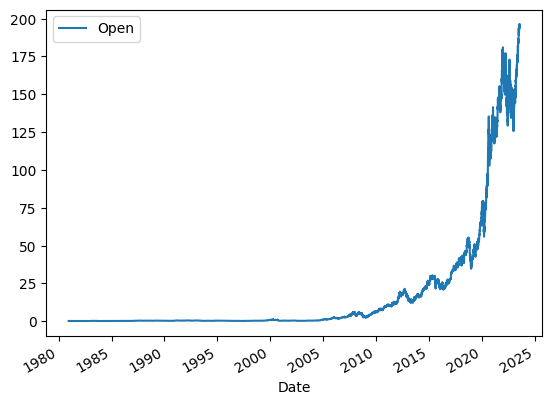

In [23]:
apple_share_price_data.plot(x="Date", y="Open")

**Extraction des dividentes**

In [27]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

<Axes: xlabel='Date'>

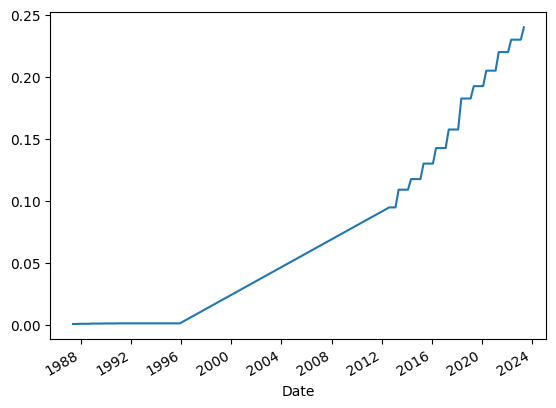

In [28]:
apple.dividends.plot()

In [29]:
amd=yf.Ticker("AMD")
print(amd)

yfinance.Ticker object <AMD>


In [30]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2023-08-01 22:33:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2023-08-01 22:33:04 (1.36 GB/s) - ‘amd.json’ saved [5838/5838]



In [31]:
import json
with open('amd.json') as json_file:
  amd_info=json.load(json_file)

amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [32]:
import json
with open('amd.json') as json_file:
  amd_info=json.load(json_file)

amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [33]:
amd_info['country']

'United States'

In [34]:
amd_info['sector']

'Technology'

In [36]:
amd_share_volume_data = amd.history(period="max")
print(type(amd_share_volume_data))
amd_share_volume_data.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0
